# APS1070
#### Basic Principles and Models - Project 1



Project 1 has two parts: a tutorial component (which will be covered in labs) and an exercises component (to be completed as homework, individually). Overall, this project is worth 12.5% of your final grade. Completing the tutorial section is worth 2.5 marks. The exercises section will be graded out of the remaining 10 marks.

In this first lab, we will be using the popular machine learning library [scikit-learn](https://scikit-learn.org/stable/) in tandem with a popular scientific computing library in Python, [NumPy](https://www.numpy.org/), to investigate basic machine learning principles and models. The topics that will be covered in this lab include:
* Introduction to scikit-learn and NumPy
* Data preparation and cleaning with Pandas
* Exploratory data analysis (EDA)
* Nearest neighbors classification algorithm

*Note:* Some other useful Python libraries include [matplotlib](https://matplotlib.org/) (for plotting/graphing) and [Pandas](https://pandas.pydata.org/) (for data analysis), though we won't be going into detail on these in this bootcamp. 

##### Jupyter Notebooks
This lab will be using [Jupyter Notebooks](https://jupyter.org/) as a Python development environment. Hopefully you're somewhat familiar with them. Write your code in *cells* (this is a cell!) and execute your code by pressing the *play* button (up top) or by entering *ctrl+enter*. To format a cell for text, you can select "Markdown" from the dropdown - the default formatting is "Code", which will usually be what you want.

#### Getting started
Let's get started. First, we're going to test that we're able to import the required libraries.  
**>> Run the code in the next cell** to import scikit-learn and NumPy.

In [0]:
print ("test")
print ("Shape:")

Testing

In [0]:
import numpy as np
import sklearn 

### NumPy Basics

Great. Let's move on to our next topic: getting a handle on NumPy basics. You can think of NumPy as sort of like a MATLAB for Python (if that helps). The main object is multidimensional arrays, and these come in particularly handy when working with data and machine learning algorithms.

Let's create a 2x4 array containing the numbers 1 through 8 and conduct some basic operations on it.  
**>> Run the code in the next cell to create and print the array.***

In [0]:
array = np.arange(8).reshape(-1,2)
array

We can access the shape, number of dimensions, data type, and number of elements in our array as follows:  
*(Tip: use "print()" when you want a cell to output more than one thing, or you want to append text to your output, otherwise the cell will output the last object you call, as in the cell above)*

In [0]:
print ("Shape:", array.shape)
print ("Dimensions:", array.ndim)
print ("Data type:" , array.dtype.name)
print ("Number of elements:", array.size)

If we have a Python list containing a set of numbers, we can use it to create an array:  
*(Tip: if you click on a function call, such as array(), and press "shift+tab" the Notebook will provide you all the details of the function)*

In [0]:
mylist = [0, 1, 1, 2, 3, 5, 8, 13, 21]
myarray = np.array(mylist)
myarray

And we can do it for nested lists as well, creating multidimensional NumPy arrays:

In [0]:
my2dlist = [[1,2,3],[4,5,6]]
my2darray = np.array(my2dlist)
my2darray

In [0]:
aa= np.array([1,2])
aa

We can also index and slice NumPy arrays like we would do with a Python list or another container object as follows:

In [0]:
array = np.arange(10) 
print ("Originally: ", array)
print ("First four elements: ", array[:4])
print ("After the first four elements: ", array[4:])
print ("The last element: ", array[-1])
array[1]

And we can index/slice multidimensional arrays, too.

In [0]:
array = np.array([[1,2,3],[4,5,6]])
print ("Originally: ", array)
print ("First row only: ", array[0,:])
print ("First column only: ", array[:,0])

#### Sneak preview

Often, when designing a machine learning classifier, it can be useful to compare an array of predictions (0 or 1 values) to another array of true values. We can do this pretty easily in NumPy to compute the *accuracy* (e.g., the number of values that are the same), for example, as follows:

In [0]:
true_values = [0, 0, 1, 1, 1, 1, 1, 0, 1, 0]
predictions = [0, 0, 0, 1, 1, 1, 0, 1, 1, 0]

true_values_array = np.array(true_values)
predictions_array = np.array(predictions)

accuracy = np.sum(true_values_array == predictions_array) / true_values_array.size
print ("Accuracy: ", accuracy * 100, "%")

In the previous cell, we took two Python lists, converted them to NumPy arrays, and then used a combination of np.sum() and .size to compute the accuracy (proportion of elements that are pairwise equal). A tiny bit more advanced, but demonstrates the power of NumPy arrays.

You'll notice we didn't used nested loops to conduct the comparison, but instead used the np.sum() function. This is an example of a vectorized operation within NumPy that is much more efficient when dealing with large datasets.

### Pandas basics

Pandas is an incredibly useful library that allows us to work with large datasets in Python. It contains myriad useful tools, and is highly compatible with other libraries like Scikit-learn, so you don't have to spend any time getting the two to play nicely together.

First we are going to load a dataset with Pandas:

In [0]:
!pip install wget

In [0]:
import wget

wget.download(
    'https://github.com/alexwolson/APS1070_data/raw/master/arabica_data.csv',
    'arabica_data.csv'
)

In [0]:
import pandas as pd

df = pd.read_csv('arabica_data.csv')

With Pandas, the main object we work with is referred to as a _DataFrame_ (hence calling our object here df). A DataFrame stores our dataset in a way that immediately gives us a lot of power to interact with it. If you just put the DataFrame in a cell on its own, you instantly get a clear, easy to read preview of the data you have:

In [0]:
df

But even though this is printed out well, the dataset is a bit too large for this view to be anything but overwhelming. Luckily, Pandas allows us to easily get some summary statistics about our data.

In [0]:
df.describe()

In [0]:
df.count().max()

Let's say we want to zero in on a single column. This is done the same way that you access a dictionary entry:

In [0]:
df['Species']

Using this method of column access on its own returns a `series` object - think of this as a DataFrame with only one column. If you want to get the raw values however, you can simply specify this by adding `.values` after your entry. Using this, and by putting the object in a `Set` (which does not allow duplicate entries), we can quickly see all of the possible values for any column:

In [0]:
(df['Variety'].values)

You may notice that the final entry in this set isn't like the others - it's `nan`, which in Pandas denotes a missing entry. When working with real world datasets it's very common for entries to be missing, and there are a variety of ways of approaching a problem like this. For now, though, we are simply going to tell Pandas to drop any row that has a missing column, using the `dropna()` method.

In [0]:
df_clean = df.dropna()
df_clean

**YOUR TURN** 
How many entries did we lose by dropping all `nan`s? ***770 samples are lost after dropping all nans!***

* What percentage of entries are left in `df_clean`? ___***41.27 % of entries are left after dropping all nans!*** 

* What column had the highest number of `nan` entries? (This can be done in one line - use Google!) ___***(( Farm Name )) column had the highest number of nan entries***

In [55]:
### Your code here
# print (df_clean.describe())
a = df.count().max()- df_clean.count().max()
print( a , "samples are lost after dropping all nans!")
print( round (df_clean.count().max() * 100 / df.count().max(),2), "% of entries are left after dropping all nans! ")
print ("((",df.count().idxmin(), ")) column had the highest number of nan entries")

770 samples are lost after dropping all nans!
41.27 % of entries are left after dropping all nans! 
(( Farm Name )) column had the highest number of nan entries


As you perform this analysis, you will probably notice that we've lost _quite a bit_ of our original data by simply dropping the `nan` values. There is another approach that we can examine, however. Instead of dropping the missing entries entirely, we can _impute_ their value using the data we do have. For a single column we can do this like so:

In [0]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(
    missing_values=np.nan,
    strategy='mean',
    verbose=1
)


imp.fit(
    df['altitude_mean_meters'].values.reshape((-1,1)) #we have to do the reshape operation because we are only using one feature.
)

df['altitude_mean_meters_imputed'] = imp.transform(df['altitude_mean_meters'].values.reshape((-1,1)))

In [0]:
df[['altitude_mean_meters','altitude_mean_meters_imputed']].head(10)

OK, great! Now we have replaced the useless NaN values with the average height. While this obviously isn't as good as original data, in a lot of situations this can be a step up from losing rows entirely. 

Sophisticated analysis can be done in only a few lines using Pandas. Let's say that we want to get the average coffee rating by country. First, we can use the `groupby` method to automatically collect the results by country. Then, we can select the column we want - `quality_score` - and calculate its mean the same way we would using NumPy:

In [0]:
df_clean.groupby('Country of Origin')['quality_score'].mean()

This is certainly interesting, but it could be presented better. First, all of the ratings are pretty high (what's the highest and lowest rating?). Let's standardize to unit mean and variance so that we can tell the difference more easily. We'll just do that on our subset here for now, but you can apply it to the entire dataset too!

In [0]:
country_means = df_clean.groupby('Country of Origin')['quality_score'].mean()
mu,si = country_means.mean(), country_means.std() #Calculate the overall mean and standard deviation of the quality scores
country_means -= mu #Subtract the mean from every entry
country_means /= si #Divide every entry by the standard deviation
country_means

This is a lot clearer! Finally, let's sort this list so that it's easier to compare entries.

In [0]:
country_means.sort_values()

Finally, we'll look at indexing using Pandas. Let's say that we want to only look at the coffee entries from Taiwan. We can use the following syntax to identify those rows:

In [0]:
#df_clean[df_clean['Country of Origin'] == 'Taiwan']
#print (df_clean[df_clean['Country of Origin'] == 'Taiwan'])
#df_clean[df_clean["Acidity"] == 8.17][df_clean["Aftertaste"] == 8.00]
df_clean[df_clean["Acidity"]== 8.50][df_clean["Aftertaste"] == 8.25]

Say that out of the Taiwanese coffees, we only want to look at those which are the Bourbon variety. We can also chain those indexing operations like so:

In [0]:
#@title Default title text
df_clean[df_clean['Country of Origin'] == 'Taiwan'][df_clean['Variety'] == 'Bourbon']

### Scikit-learn Basics

Scikit-learn is a great library to use for doing machine learning in Python. Data preparation, exploratory data analysis (EDA), classification, regression, clustering; it has it all. 

Scikit-learn usually expects data to be in the form of a 2D matrix with dimensions *n_samples x n_features* with an additional column for the target. To get acquainted with scikit-learn, we are going to use the [iris dataset](https://archive.ics.uci.edu/ml/datasets/iris), one of the most famous datasets in pattern recognition. 

Each entry in the dataset represents an iris plant, and is categorized as: 

* Setosa (class 0)
* Versicolor (class 1)
* Virginica (class 2)

These represent the target classes to predict. Each entry also includes a set of features, namely:

* Sepal width (cm)
* Sepal length (cm)
* Petal length (cm)
* Petal width (cm)

In the context of machine learning classification, the remainder of the lab is going to investigate the following question:  
*Can we design a model that, based on the iris sample features, can accurately predict the iris sample class? *

Scikit-learn has a copy of the iris dataset readily importable for us. Let's grab it now and conduct some EDA.

In [0]:
from sklearn.datasets import load_iris
iris_data = load_iris()
feature_data = iris_data.data
print(iris_data)
print(feature_data)

**YOUR TURN:** "feature_data" now contains the feature data for all of the iris samples. 
* What is the shape of this feature data? 


 _______***The shape of the feature data is: (150, 4)***
* The data type? ________________***The data type is: float64***
* How many samples are there? ________________***there are 150 samples***
* How many features are there? ________________***there are 4 features***

In [0]:
## Enter your code here
print ("The shape of the feature data is:",feature_data.shape)
print("The data type is:",feature_data.dtype.name)
print("there are 150 samples")
print("there are 4 features")


The shape of the feature data is: (150, 4)
The data type is: float64
there are 150 samples
there are 4 features


Next, we will save the target classification data in a similar fashion.

In [0]:
target_data = iris_data.target
target_names = iris_data.target_names
print (target_data)
print (target_names)

**YOUR TURN:**
* What values are in "target_data"? _________ 0,1,2
* What is the data type? __________ int64
* What values are in "target_names"? ____ 'setosa', 'versicolor', 'virginica'
* What is the data type? ________ str320
* How many samples are of type "setosa"? _____ 50

In [0]:
## Enter your code here
print ("Values are in target_data are:",set(target_data))
print ("Data type in target_data is:", target_data.dtype.name)
print ("Values in target_names:",target_names)
print ("Data type in target_names is:", target_names.dtype.name)
print ("numberof setosa samples are:", np.sum(target_data == 0))
#np.count_nonzero(target_data)


Values are in target_data are: {0, 1, 2}
Data type in target_data is: int64
Values in target_names: ['setosa' 'versicolor' 'virginica']
Data type in target_names is: str320
numberof setosa samples are: 50


We can also do some more visual EDA by plotting the samples according to a subset of the features and coloring the data points to coincide with the sample classification. We will use [matplotlib](https://matplotlib.org/), a powerful plotting library within Python, to accomplish this.

For example, lets plot sepal width vs. sepal length.


In [0]:
import matplotlib.pyplot as plt

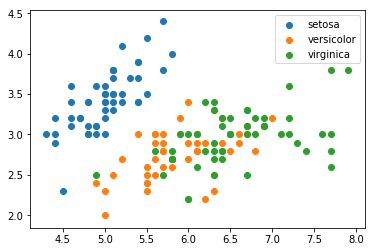

In [0]:
setosa = feature_data[target_data==0]
versicolor = feature_data[target_data==1]
virginica = feature_data[target_data==2]
plt.scatter(setosa[:,0], setosa[:,1], label="setosa")
plt.scatter(versicolor[:,0], versicolor[:,1], label="versicolor")
plt.scatter(virginica[:,0], virginica[:,1], label="virginica")
plt.legend()


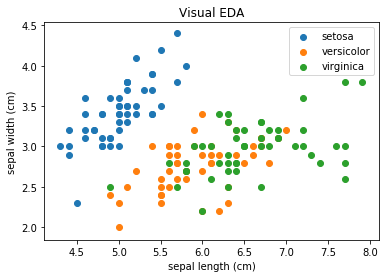

In [0]:
setosa = feature_data[target_data==0]
versicolor = feature_data[target_data==1]
virginica = feature_data[target_data==2]

plt.scatter(setosa[:,0], setosa[:,1], label="setosa")
plt.scatter(versicolor[:,0], versicolor[:,1], label="versicolor")
plt.scatter(virginica[:,0], virginica[:,1], label="virginica")

plt.legend()
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.title("Visual EDA");

In the above step, we used boolean indexing to filter the feature data based on the target data class. This allowed us to create a scatter plot for each of the iris classes and distinguish them by color.

*Observations*: We can see that the "setosa" class typically consists of medium-to-high sepal width with low-to-medium sepal length, while the other two classes have lower width and higher length. The "virginica" class appears to have the largest combination of the two. 

**YOUR TURN:** 
* Which of the iris classes is seperable based on sepal characteristics? ______***setosa___***_______
* Which of the iris classes is not? ______***versicolor and virginica__________***
* Can we (easily) visualize each of the samples w.r.t. all features on the same plot? Why/why not? ____for versicolor and virginica, it is hard to visualze, but for setosa, we can.____________

### Creating a Nearest Neighbors Classifier

Now that we've explored the data a little bit, we're going to use scikit-learn to create a nearest neighbors classifier for the data. Effectively we'll be developing a model whose job it is to build a relationship over input feature data (sepal and petal characteristics) that predicts the iris sample class (e.g. "setosa"). This is an example of a *supervised learning* task; we have all the features and all the target classes.

Model creation in scikit-learn follows a **data prep -> fit -> predict** process. The "fit" function is where the actual model is trained and parameter values are selected, while the "predict" function actually takes the trained model and applies it to the new samples.

First, we load the nearest neighbor library from scikit-learn:

In [0]:
from sklearn import neighbors

Now, we're going to save our feature data into an array called 'X' and our target data into an array called 'y'. We don't *need* to do this, but it is traditional to think of the problem using this notation.

In [0]:
X = feature_data
y = target_data

Next, we create our nearest neighbor classifier object:

In [0]:
knn = neighbors.KNeighborsClassifier(n_neighbors=1)

And then we *fit* it to the data (i.e., train the classifier).

In [0]:
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

Now we have a model! If you're new to this, you've officially built your first machine learning model. If you use "knn.predict(*[[feature array here]]*)", you can use your trained model to predict the class of a new iris sample. 

**YOUR TURN:**
* What is the predicted class of a new iris sample with feature vector [3,4,5,2]? What is its name? ___***feature vector2, name: virginica___________***
* Do you think this model is overfit or underfit to the iris dataset? Why? _____***overfit, because it tests all single neighbours, so gets too much details ***__________
* How many neighbors does our model consider when classifying a new sample? _______***_one__***______

In [0]:
knn.predict([[3,4,5,2]])

array([2])

As you may have noted in the previous cell, we've trained this classifier on our *entire dataset*. This typically isn't done in practice and results in overfitting to the data. Here's a bit of a tricky question:

**YOUR TURN:**
* If we use our classifier to predict the classes of the iris samples that were used to train the model itself, what will our overall accuracy be? _____100%___________

We can validate our hypothesis fairly easily using either: i) the NumPy technique for calculating accuracy we used earlier in the lab, or ii) scikit-learn's in-house "accuracy_score()" function.

Let's use our technique first:

In [0]:
accuracy = np.sum(target_data == knn.predict(feature_data)) / target_data.size
print ("Accuracy: ", accuracy * 100, "%")

Accuracy:  100.0 %


and then using scikit-learn's customized function:

In [0]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(target_data, knn.predict(feature_data))
print ("Accuracy: ", accuracy * 100, "%")

Accuracy:  100.0 %


We see that our classifier has achieved 100% accuracy (and both calculation methods agree)!

**DISCUSSION:** 
* Why do you think the model was able to achieve such a "great" result? 
* What does this really tell us? 
* Do you expect the model to perform this well on new data?

### Exercises (to be completed on your own)

Let's take the tools we have learned in this lab and put them into practice on a new dataset.

We're going to work with a dataset focused on diabetes. It contains a variety of health metrics for a number of patients, and then in a second object it shows whether or not that patient had diabetes. Download it using the cell below:

In [0]:
from sklearn.datasets import fetch_openml

diabetes_data = fetch_openml(
    name='diabetes',
    cache=False )


First off, take a look at the `data`, `target` and `feature_names` entires in the `diabetes_data` dictionary. They contain the information we'll be working with here. Then, create a Pandas DataFrame called `diabetes_df` containing the data and the targets, with the feature names as column headings. If you need help, refer [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) for more detail on how to achieve this.

* What was the average age of participants? [1] ___***_33.24***
* How many participants tested positive? How many tested negative? [1] ___***_268***

In [57]:
### YOUR CODE HERE
import numpy as np
diab_d = diabetes_data.data
diab_t = diabetes_data.target
diab_tn = diabetes_data.feature_names
#>>>Creating Dataframe
import pandas as pd
df = pd.DataFrame(diab_d, columns = diab_tn) 
df["target"] = diab_t
print('The average age of participants is:',round ((sum (df["age"])/df.count().max()),2)) 
print( np.sum(diab_t == 'tested_positive'),"participants tested possitive!")
#

The average age of participants is: 33.24
268 participants tested possitive!


In [0]:
##EXERCISEs
###print(df)
###print (diab_d)
###print (diab_d.shape) #: (768,8)
###print (diab_d.dtype) #: float64
###print (diab_t)
###print (diab_t.shape) #: (768,)
###print (diab_t.dtype) #: object
###print (diab_tn)
#print (diab_tn.shape)  ## NO it is a list
#print (diab_tn.dtype)  ## NO it is a list
#diab_f_clean = diab_f.dropna()
#print(diab_f[-1])
#sum_age = sum(diab_f[-1])
#size_age = size(diab_f)
#print(diab_f[-1])
#print(diab_f)
#print (diab_f.shape)
#print (diab_f.dtype.name)
##print(diab_f.dataframe) FEATURE NAMES?
#diab_t = diabetes_data.target
#print(diab_t)
#print(diab_t.shape)
#print (diab_t.dtype.name)
#diab_tname = diabetes_data.target_names #  TARGET NAMES? target_names = iris_data.target_names
###sum(diab_f[-1])/768
#list (diab_d)
#sum (diab_d[:,7])
#print('The average age of participants is:',round ((sum (diab_d[:,7])/768),2)) 

The targets are currently a string representing whether or not the patient has diabetes. However, it's more useful for us if this column contains a 1 or a 0 depending on whether the patient has diabetes. Use the [Label Encoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) class from Scikit-Learn to convert the labels into integers.

In [58]:
from sklearn.preprocessing import LabelEncoder
### YOUR CODE HERE
le = LabelEncoder()
le.fit (['tested_negative','tested_positive'])
le.classes_
target01 = le.transform(diab_t)
print (target01)
#le.inverse_transform(target01)

[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1
 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1
 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 

Now we are going to create a classifier to predict whether a patient has diabetes based on their vitals. 

Using `cross_val_score`, report mean cross validation accuracy on a KNN classifier with K=3 and cv=10 folds. Remember that the `target` column holds our labels.

* What accuracy did the model achieve?[1] ____***70.31%***
* Find a value for K that performs better than this. What value for K did you use? What was the performance? [2] ____ ***In the first 20 tests for K=1 to 20, with K=17, the accuracy would be 75.53%. ***

In [59]:
### YOUR CODE HERE
from sklearn import neighbors
from sklearn.model_selection import cross_val_score
x = diab_d
y = diab_t
j,k = 0,0
for i in range (1,21):
  knn = neighbors.KNeighborsClassifier(n_neighbors=i)
  scores = cross_val_score(knn, x, y, cv=10)
  j = round(scores.mean()*100,2)
  if i ==3 :
    print ('The accuracy when K=3 (and cv=10 folds) is:',j)
  #print (i , j)
  if j>k :
    k=j
    m,n = i,j
  i += 1
print ('The best performance among the first', i-1,'Ks, is when the number of neghbours (K)=', m, '\n and the accuracy for this "K" is',n,'%')

The accuracy when K=3 (and cv=10 folds) is: 70.31
The best performance among the first 20 Ks, is when the number of neghbours (K)= 17 
 and the accuracy for this "K" is 75.53 %


Take a look at the `skin` feature.

* According to the dataset description in `diabetes_data['DESCR']`, what does this feature represent? [1] __***4. Triceps skin fold thickness (mm)__***
* Are there any unusual entries in this column? If so, why? [2] __The skin thickness cannot be zero! With these zeros, there will be 227 people without skin in this dataset which is so creepy!!! these zero(s) are probably noise/missing data, which was replaced with zeros as a number__

Use the `SimpleImputer` class from scikit-learn to impute missing values for the `skin` and `insu` columns. Overwrite the existing `skin` and `insu` columns with these new values.

In [60]:
### YOUR CODE HERE
#print (diabetes_data)
diab_des = diabetes_data.DESCR
print (diab_des)
print("\n")
print("\n")
print ("+++++++++++++++++++++++++++++++ SKIN +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
print("\n")
print("\n")
print (df['skin'])
print("\n")
print("\n")
print ("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
print("\n")
print("\n")
print ('number of people without skin:',sum(df['skin'] == 0),'!!!')
print("\n")
print("\n")

**Author**: [Vincent Sigillito](vgs@aplcen.apl.jhu.edu)  

**Source**: [Obtained from UCI](https://archive.ics.uci.edu/ml/datasets/pima+indians+diabetes) 

**Please cite**: [UCI citation policy](https://archive.ics.uci.edu/ml/citation_policy.html)  

1. Title: Pima Indians Diabetes Database
 
 2. Sources:
    (a) Original owners: National Institute of Diabetes and Digestive and
                         Kidney Diseases
    (b) Donor of database: Vincent Sigillito (vgs@aplcen.apl.jhu.edu)
                           Research Center, RMI Group Leader
                           Applied Physics Laboratory
                           The Johns Hopkins University
                           Johns Hopkins Road
                           Laurel, MD 20707
                           (301) 953-6231
    (c) Date received: 9 May 1990
 
 3. Past Usage:
     1. Smith,~J.~W., Everhart,~J.~E., Dickson,~W.~C., Knowler,~W.~C., &
        Johannes,~R.~S. (1988). Using the ADAP learning algorithm to forecast
  

In [0]:
### YOUR CODE HERE
### Imputing skin and insu
from sklearn.impute import SimpleImputer

imp = SimpleImputer(
    missing_values=0,
    strategy='mean',
    verbose=1
)

imp.fit(
    df['skin'].values.reshape((-1,1))     

)

df['skin_imputed'] = imp.transform(df['skin'].values.reshape((-1,1)))
imp.fit(
    df['insu'].values.reshape((-1,1))     
)
df['insu_imputed'] = imp.transform(df['insu'].values.reshape((-1,1)))

df[['skin','skin_imputed','insu','insu_imputed']].head(5)


,skin,skin_imputed,insu,insu_imputed
0,35.0,35.00000,0.0,155.548223
1,29.0,29.00000,0.0,155.548223
2,0.0,29.15342,0.0,155.548223
3,23.0,23.00000,94.0,94.000000
4,35.0,35.00000,168.0,168.000000


Re-split the data and fit a new classifier.

* Is performance better or worse with imputed values? Why might this be? [2] __***THE PERFORMANCE GOT BETTER! We have 0.2% improvement in both situations, when K=3 and also in the first 20 Ks.This happened because we have added more value to our samples which resulted in better classifiers.
with K=3, accuracy = 70.57% ; 
with K=18, accuracy = 75.79% ***bold text***
***

In [0]:


del df ['skin']
del df ['insu']
del df ['target']
#print (df)


In [0]:
import numpy as np
diab_d_imp = np.array(df)
#diab_d_imp
#diab_t

In [0]:
### YOUR CODE HERE
from sklearn import neighbors
from sklearn.model_selection import cross_val_score
x = diab_d_imp
y = diab_t
j,k = 0,0
for i in range (1,21):
  knn = neighbors.KNeighborsClassifier(n_neighbors=i)
  scores = cross_val_score(knn, x, y, cv=10)
  j = round(scores.mean()*100,2)
  if i ==3 :
    print ('The accuracy when K=3 (and cv=10 folds) is:',j)
  #print (i , j)
  if j>k :
    k=j
    m,n = i,j
  i += 1
print ('The best performance among the first', i-1,'Ks, is when the number of neghbours (K)=', m, '\n and the accuracy for this "K" is',n,'%')


The accuracy when K=3 (and cv=10 folds) is: 70.57
The best performance among the first 20 Ks, is when the number of neghbours (K)= 18 
 and the accuracy for this "K" is 75.79 %
